In [1]:
import pandas as pd
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

import pickle
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC

from imblearn.under_sampling import ClusterCentroids
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [2]:
df = pd.read_excel(r'C:\Users\Ciro\Desktop\Python\Filmes Tera\projeto_filme_tera\testes123\dados_para_split1234.xlsx')

### MACHINE LEARNING

In [3]:
df['Budget ($million)'] = df['Budget ($million)'].astype(float)

In [4]:
tipos_de_coluna = df.dtypes
print(tipos_de_coluna)

Budget ($million)      float64
Oscar Winners            int64
Runtime (Minutes)      float64
Action                   int64
Adventure                int64
Animation                int64
Biography                int64
Comedy                   int64
Crime                    int64
Drama                    int64
Family                   int64
Fantasy                  int64
History                  int64
Horror                   int64
Music                    int64
Musical                  int64
Mystery                  int64
Romance                  int64
Sci-Fi                   int64
Sport                    int64
Thriller                 int64
War                      int64
Western                  int64
sucesso_recalculado      int64
dtype: object


In [5]:
df = df.dropna(subset=['sucesso_recalculado'])

In [6]:
df

,Budget ($million),Oscar Winners,Runtime (Minutes),Action,Adventure,Animation,Biography,Comedy,Crime,Drama,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,sucesso_recalculado
0,0.00,0,118.0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.45,0,103.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1.50,0,103.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,6.50,0,99.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,9.00,0,117.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,60.00,0,90.0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
496,65.00,0,129.0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
497,50.00,0,161.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
498,7.00,0,119.0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


Load features and target data

In [7]:
X = df.drop("sucesso_recalculado", axis=1)
y = df["sucesso_recalculado"]

In [8]:
y

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: sucesso_recalculado, Length: 500, dtype: int64

Separa os dados em treino e teste

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=20)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(375, 23) (375,)
(125, 23) (125,)


In [10]:
columns_to_scale = ["Budget ($million)", "Runtime (Minutes)"]

In [11]:
#Let's created an empty standard scalar object
scaler = StandardScaler()


In [12]:
#fit our input data, this will calculate the mean and standard deviation of each feature from unskilled inputs
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [13]:
# Especifique o nome do arquivo onde você deseja salvar o scaler
nome_arquivo = "standard_scaler_com_diretor.pkl"

# Use a função joblib.dump para salvar o scaler
joblib.dump(scaler, nome_arquivo)

['standard_scaler_com_diretor.pkl']

Cria função pra avaliar os modelos

In [14]:
def evaluate(model, X_train, X_test, y_train, y_test):
    '''
    Avalia o desempenho de um modelo de machine learning nos dados de treino e teste.

    Parâmetros:
    -----------
    model : objeto de modelo de machine learning
        O modelo de machine learning treinado a ser avaliado.

    X_train : array-like de forma (n_amostras, n_características)
        Os dados de entrada do treino.

    X_test : array-like de forma (n_amostras, n_características)
        Os dados de entrada do teste.

    y_train : array-like de forma (n_amostras,)
        Os dados de destino do treino.

    y_test : array-like de forma (n_amostras,)
        Os dados de destino do teste.

    Retorna:
    --------
    None
    '''
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("RESULTADOS DO TREINO: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"MATRIZ DE CONFUSÃO:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"PONTUAÇÃO DE ACURÁCIA:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"RELATÓRIO DE CLASSIFICAÇÃO:\n{clf_report}")

    print("RESULTADOS DO TESTE: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"MATRIZ DE CONFUSÃO:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"PONTUAÇÃO DE ACURÁCIA:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"RELATÓRIO DE CLASSIFICAÇÃO:\n{clf_report}")


inserir métricas de recall e precisão e f1.
temos que evitar falsos positivos - qual a melhor métrica? PRECISÃO!

Cria funções pra plotar gráficos de recall e precisão e ROC

In [15]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Plota a precision e recall em relação ao threshold de classificação.

    Args:
        precisions (array-like): Um array que contém os valores de precision.
        recalls (array-like): Um array que contém os valores de recall.
        thresholds (array-like): Um array que contém os valores de threshold.

    Returns:
        None
    """
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precision/Recall Tradeoff")

def plot_roc_curve(fpr, tpr, label=None):
    """
    Plota a curva ROC.

    Args:
        fpr (array-like): Um array que contém os valores da taxa de falsos positivos.
        tpr (array-like): Um array que contém os valores da taxa de verdadeiros positivos.
        label (string, optional): Label para a curva ROC. Default é None.

    Returns:
        None
    """
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

###  1. Regressão logística

In [16]:
print("\n=========LOGISTIC REGRESSION============")

n_estimators = [100, 500, 1000, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 5, 10, 15, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
criterion = ['gini', 'entropy']

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1.0, 10.0],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 500, 1000]
}

# Cria um objeto de regressão logística
lr_clf = LogisticRegression(random_state=20, solver='liblinear', penalty='l1')

# Cria um objeto GridSearchCV para otimizar os hiperparâmetros
grid_search = GridSearchCV(lr_clf, param_grid, scoring="accuracy", cv=5)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Melhores parâmetros: {best_params}")

# Cria um novo objeto de Regressão Logística com os melhores parâmetros encontrados
lr_clf = LogisticRegression(**best_params)
lr_clf.fit(X_train, y_train)

# Avalia o desempenho do modelo
evaluate(lr_clf, X_train, X_test, y_train, y_test)


=========LOGISTIC REGRESSION============


c:\Users\Ciro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Ciro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Ciro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Ciro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Ciro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Ciro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

Melhores parâmetros: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
RESULTADOS DO TREINO: 
MATRIZ DE CONFUSÃO:
[[274   6]
 [ 72  23]]
PONTUAÇÃO DE ACURÁCIA:
0.7920
RELATÓRIO DE CLASSIFICAÇÃO:
                    0          1  accuracy   macro avg  weighted avg
precision    0.791908   0.793103     0.792    0.792505       0.79221
recall       0.978571   0.242105     0.792    0.610338       0.79200
f1-score     0.875399   0.370968     0.792    0.623184       0.74761
support    280.000000  95.000000     0.792  375.000000     375.00000
RESULTADOS DO TESTE: 
MATRIZ DE CONFUSÃO:
[[96  1]
 [23  5]]
PONTUAÇÃO DE ACURÁCIA:
0.8080
RELATÓRIO DE CLASSIFICAÇÃO:
                   0          1  accuracy   macro avg  weighted avg
precision   0.806723   0.833333     0.808    0.820028      0.812683
recall      0.989691   0.178571     0.808    0.584131      0.808000
f1-score    0.888889   0.294118     0.808    0.591503      0.755660
support    97.000000  28.000000     0.808  125.0000

Cria gráficos para avaliar precisão e recall

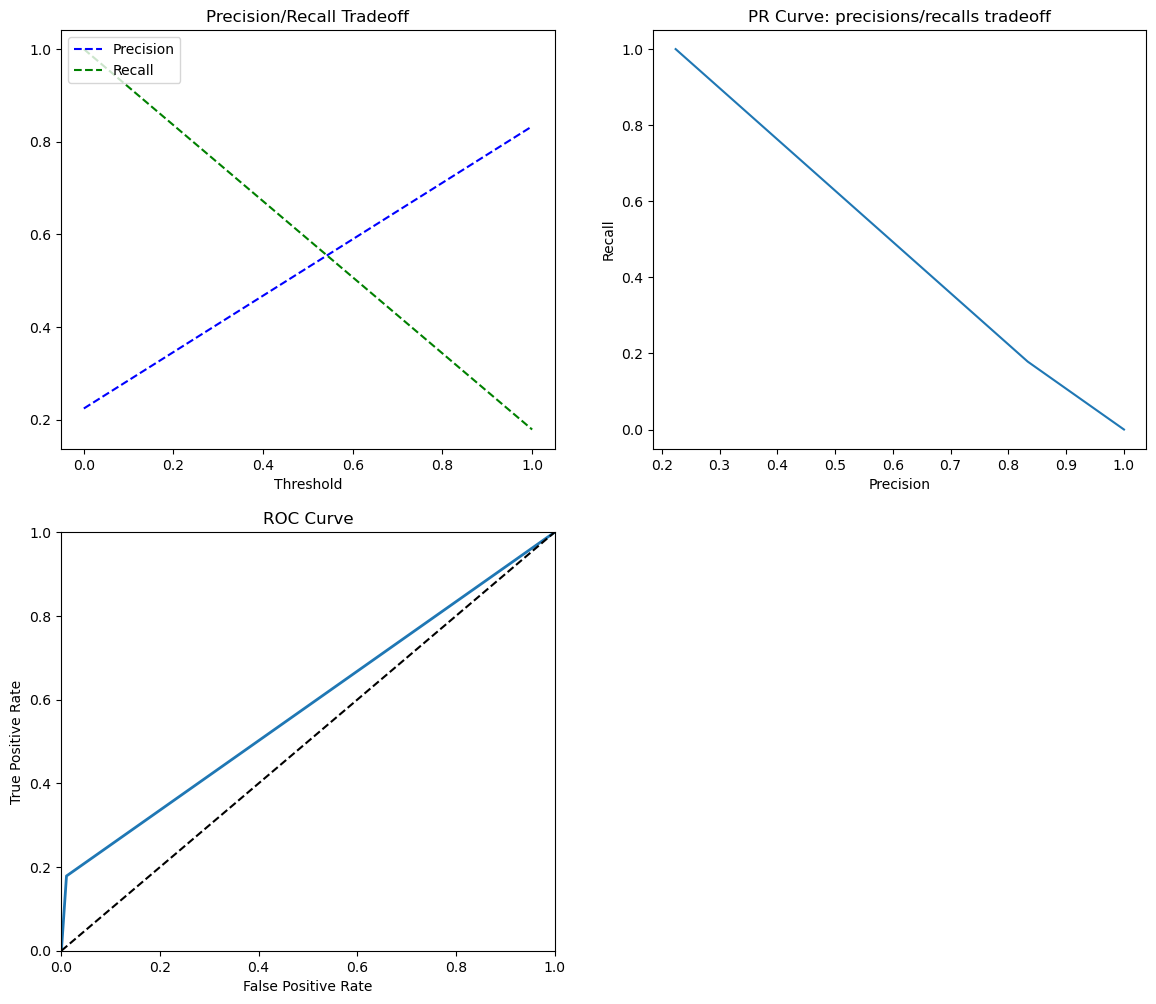

In [17]:
precisions, recalls, thresholds = precision_recall_curve(y_test, lr_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, lr_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

In [18]:
scores_dict = {
    'Logistic Regression': {
        'Train': accuracy_score(y_train, lr_clf.predict(X_train)),
        'Test': accuracy_score(y_test, lr_clf.predict(X_test)),
    },
}

In [19]:
scores = cross_val_score(lr_clf, X_train, y_train, cv=10)

print(f"Scores: {scores}")
print(f"Cross-Validation score mean: {scores.mean() * 100:.2f}% (+/-{scores.std() * 100:.2f})")

Scores: [0.76315789 0.89473684 0.78947368 0.76315789 0.78947368 0.78378378
 0.81081081 0.78378378 0.81081081 0.72972973]
Cross-Validation score mean: 79.19% (+/-4.12)


### Random Forest

In [20]:
print("\n=========RANDOM FOREST============")
#5 trees took 16s precision   0.805310
#10 trees took 27s precision   0.810811
#50 trees took 1m27s precision   0.805556
#100 trees took 2m23s precision   0.816514
#500 trees took 11m21s precision   0.809091
#n_estimators = [100, 500, 1000, 1500]
n_estimators = [5, 10, 50, 100, 500]
max_features = ['auto', 'sqrt']
max_depth = [2, 5, 10, 15, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
criterion = ['gini', 'entropy']

params_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

rf_clf = RandomForestClassifier(random_state=20)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="f1", cv=5, verbose=1, n_jobs=-1)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

evaluate(rf_clf, X_train, X_test, y_train, y_test)


=========RANDOM FOREST============
Fitting 5 folds for each of 900 candidates, totalling 4500 fits


c:\Users\Ciro\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters: {'bootstrap': False, 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500}


c:\Users\Ciro\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RESULTADOS DO TREINO: 
MATRIZ DE CONFUSÃO:
[[272   8]
 [ 27  68]]
PONTUAÇÃO DE ACURÁCIA:
0.9067
RELATÓRIO DE CLASSIFICAÇÃO:
                    0          1  accuracy   macro avg  weighted avg
precision    0.909699   0.894737  0.906667    0.902218      0.905909
recall       0.971429   0.715789  0.906667    0.843609      0.906667
f1-score     0.939551   0.795322  0.906667    0.867436      0.903013
support    280.000000  95.000000  0.906667  375.000000    375.000000
RESULTADOS DO TESTE: 
MATRIZ DE CONFUSÃO:
[[93  4]
 [19  9]]
PONTUAÇÃO DE ACURÁCIA:
0.8160
RELATÓRIO DE CLASSIFICAÇÃO:
                   0          1  accuracy   macro avg  weighted avg
precision   0.830357   0.692308     0.816    0.761332      0.799434
recall      0.958763   0.321429     0.816    0.640096      0.816000
f1-score    0.889952   0.439024     0.816    0.664488      0.788944
support    97.000000  28.000000     0.816  125.000000    125.000000


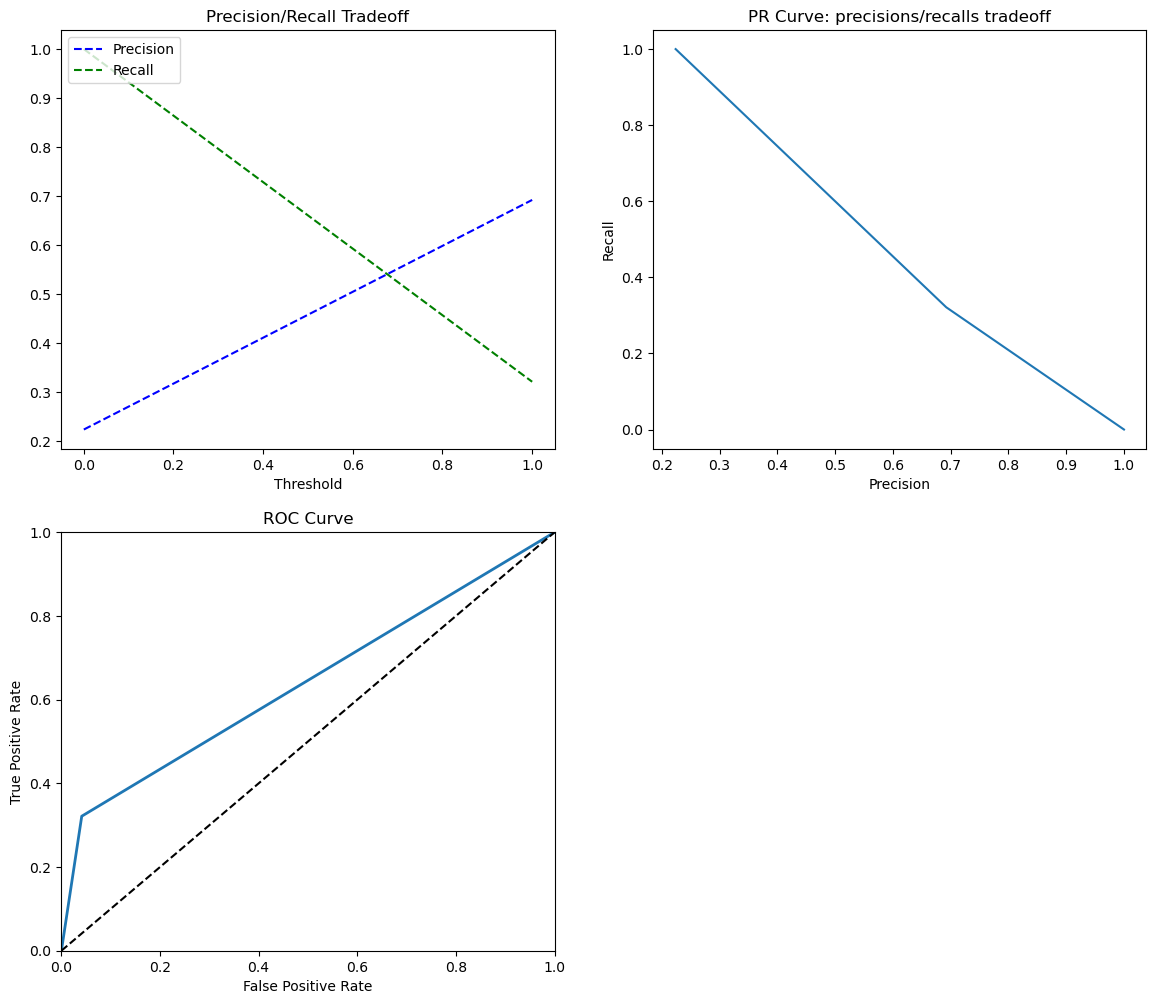

In [21]:
precisions, recalls, thresholds = precision_recall_curve(y_test, rf_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, rf_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

In [22]:
scores_dict['Random Forest'] = {
        'Train': accuracy_score(y_train, rf_clf.predict(X_train)),
        'Test': accuracy_score(y_test, rf_clf.predict(X_test)),
    }

### XGBoost

In [23]:
n_estimators = [50, 100, 250]
max_depth = [2, 3, 5, 10, 15]
# booster = ['gbtree', 'gblinear']
base_score = [0.2, 0.25, 0.5, 0.75, 0.99]
learning_rate = [0.05, 0.1, 0.5, 0.9, 1]
min_child_weight = [1, 2, 3, 4]
subsample = [0.5, 0.75, 0.85, 0.9, 1]
colsample_bytree = [0.5, 0.75, 0.85, 0.9, 1]
colsample_bynode = [0.5, 0.75, 0.85, 0.9, 1]
colsample_bylevel = [0.5, 0.75, 0.85, 0.9, 1]

params_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'learning_rate' : learning_rate,
    'min_child_weight' : min_child_weight,
#     'booster' : booster,
    'base_score' : base_score,
    'subsample': subsample,
#     'colsample_bytree': colsample_bytree,
#     'colsample_bynode': colsample_bynode,
#     'colsample_bylevel': colsample_bylevel,
}

xgb_clf = xgb.XGBClassifier(random_state=20)

xgb_cv = GridSearchCV(xgb_clf, params_grid, cv=5, scoring = 'f1',n_jobs =-1, verbose=1)


xgb_cv.fit(X_train, y_train)
best_params = xgb_cv.best_params_
print(f"Best paramters: {best_params}")

xgb_clf = xgb.XGBClassifier(**best_params)
xgb_clf.fit(X_train, y_train)

evaluate(xgb_clf, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 7500 candidates, totalling 37500 fits
Best paramters: {'base_score': 0.5, 'learning_rate': 1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.5}
RESULTADOS DO TREINO: 
MATRIZ DE CONFUSÃO:
[[268  12]
 [ 16  79]]
PONTUAÇÃO DE ACURÁCIA:
0.9253
RELATÓRIO DE CLASSIFICAÇÃO:
                    0          1  accuracy   macro avg  weighted avg
precision    0.943662   0.868132  0.925333    0.905897      0.924528
recall       0.957143   0.831579  0.925333    0.894361      0.925333
f1-score     0.950355   0.849462  0.925333    0.899908      0.924795
support    280.000000  95.000000  0.925333  375.000000    375.000000
RESULTADOS DO TESTE: 
MATRIZ DE CONFUSÃO:
[[85 12]
 [19  9]]
PONTUAÇÃO DE ACURÁCIA:
0.7520
RELATÓRIO DE CLASSIFICAÇÃO:
                   0          1  accuracy   macro avg  weighted avg
precision   0.817308   0.428571     0.752    0.622940      0.730231
recall      0.876289   0.321429     0.752    0.598859      0.752000
f1-score 

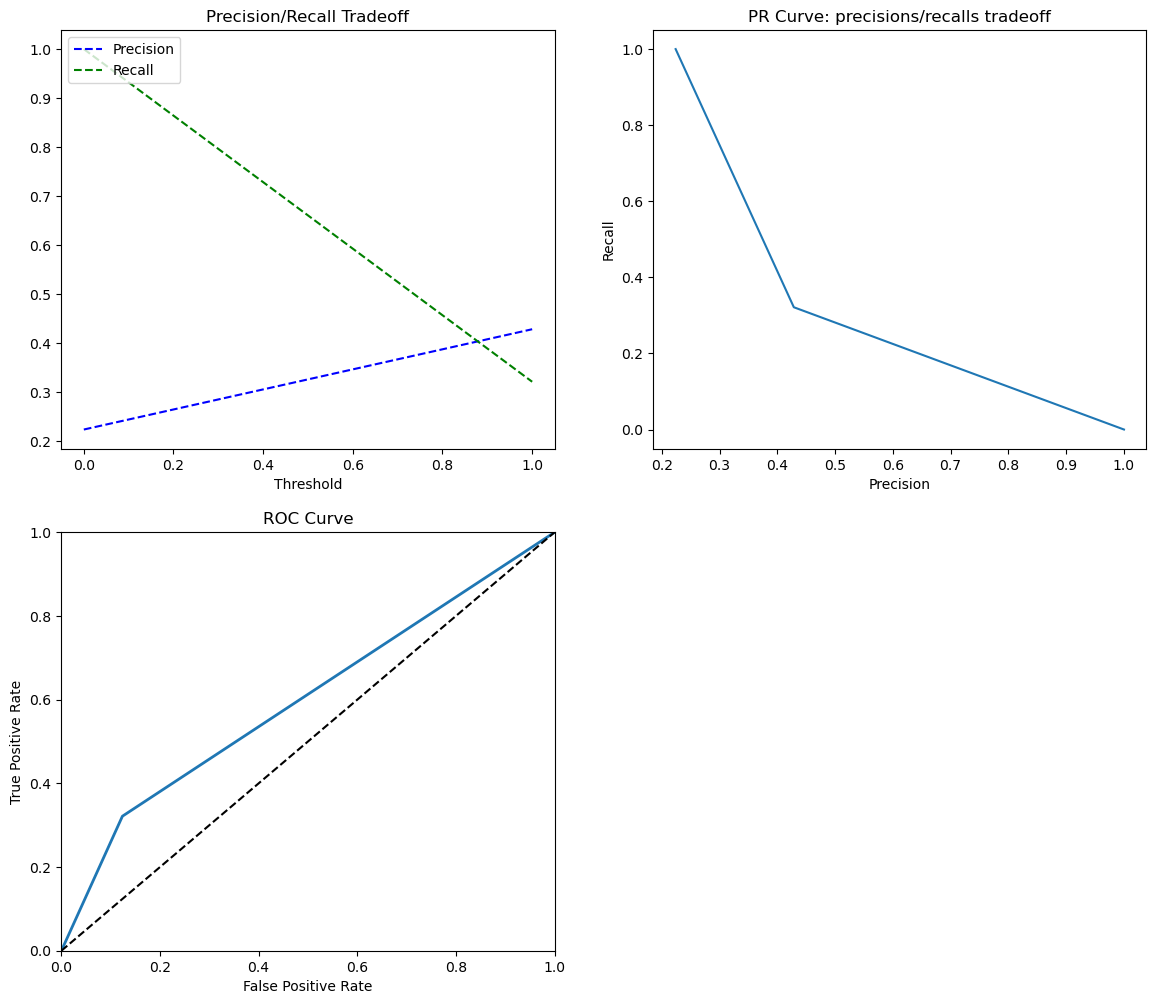

In [24]:
precisions, recalls, thresholds = precision_recall_curve(y_test, xgb_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, xgb_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

In [25]:
scores_dict['XGBoost'] = {
        'Train': accuracy_score(y_train, xgb_clf.predict(X_train)),
        'Test': accuracy_score(y_test, xgb_clf.predict(X_test)),
    }

### Support Vector Machine

In [26]:
param_grid = {
    'C': [60, 70, 75, 65 ],
    'gamma': [0.002, 0.001, 0.0009, 0.0008, 0.0007],
    'kernel': ['rbf', 'poly', 'linear'],
    'probability': [True, False]
}

svm_cv = GridSearchCV(SVC(random_state=20), param_grid, scoring='f1', verbose=1, cv=5)
svm_cv.fit(X_train, y_train)

best_params = svm_cv.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)
evaluate(svm_clf, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best params: {'C': 60, 'gamma': 0.002, 'kernel': 'rbf', 'probability': True}
RESULTADOS DO TREINO: 
MATRIZ DE CONFUSÃO:
[[274   6]
 [ 70  25]]
PONTUAÇÃO DE ACURÁCIA:
0.7973
RELATÓRIO DE CLASSIFICAÇÃO:
                    0          1  accuracy   macro avg  weighted avg
precision    0.796512   0.806452  0.797333    0.801482      0.799030
recall       0.978571   0.263158  0.797333    0.620865      0.797333
f1-score     0.878205   0.396825  0.797333    0.637515      0.756256
support    280.000000  95.000000  0.797333  375.000000    375.000000
RESULTADOS DO TESTE: 
MATRIZ DE CONFUSÃO:
[[94  3]
 [23  5]]
PONTUAÇÃO DE ACURÁCIA:
0.7920
RELATÓRIO DE CLASSIFICAÇÃO:
                   0          1  accuracy   macro avg  weighted avg
precision   0.803419   0.625000     0.792    0.714209      0.763453
recall      0.969072   0.178571     0.792    0.573822      0.792000
f1-score    0.878505   0.277778     0.792    0.578141      0.743942


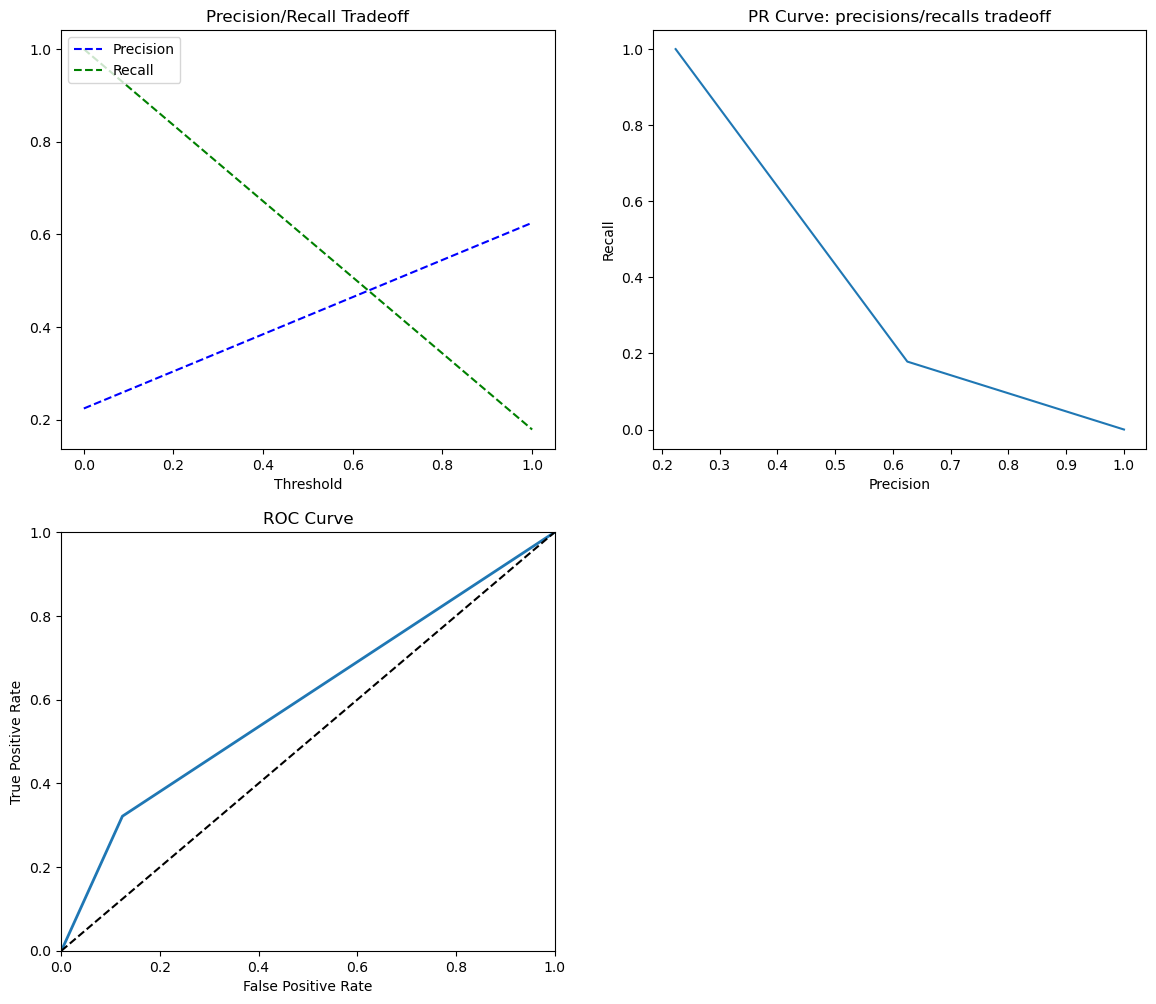

In [27]:
precisions, recalls, thresholds = precision_recall_curve(y_test, svm_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, xgb_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

In [28]:
scores_dict['Support Vector Machine'] = {
        'Train': accuracy_score(y_train, svm_clf.predict(X_train)),
        'Test': accuracy_score(y_test, svm_clf.predict(X_test)),
    }

## Comparação entre os modelos

Load models

In [29]:
#import pickle

#with open('models/lr_clf', 'rb') as file:
#    lr_clf = pickle.load(file)

#with open('models/Rf_clf', 'rb') as file:
#    rf_clf = pickle.load(file)

#with open('models/Xgb_clf', 'rb') as file:
#    xgb_clf = pickle.load(file)

#with open('models/svm_clf', 'rb') as file:
#    svm_clf = pickle.load(file)

In [30]:
ml_models = {
    'Logistic Regression': lr_clf,
    'Random Forest': rf_clf,
    'XGboost': xgb_clf,
    'Support Vector Machine': svm_clf
}
for model in ml_models:
    print(f"{model.upper()} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")

LOGISTIC REGRESSION roc_auc_score: 0.584
RANDOM FOREST roc_auc_score: 0.640
XGBOOST roc_auc_score: 0.599
SUPPORT VECTOR MACHINE roc_auc_score: 0.574


<Axes: >

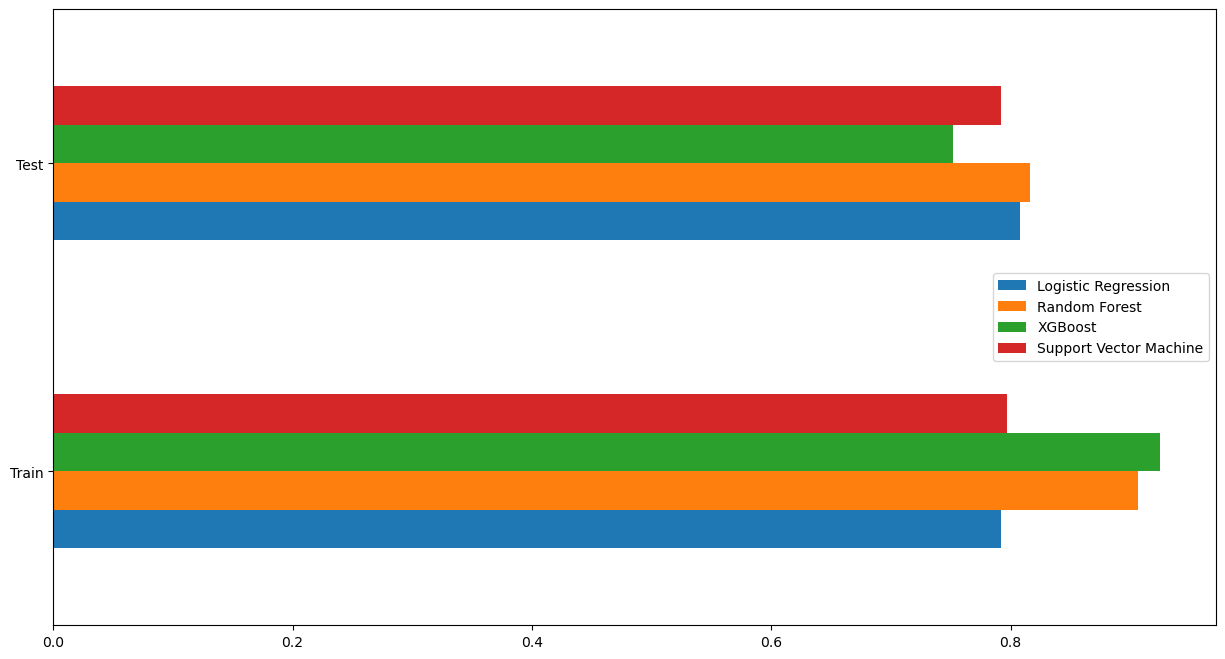

In [31]:
scores_df = pd.DataFrame(scores_dict)

scores_df.plot(kind='barh', figsize=(15, 8))

## Salvar modelos

In [32]:
with open('lr_clf.pkl', 'wb') as file:
    pickle.dump(lr_clf, file)

with open('Rf_clf.pkl', 'wb') as file:
    pickle.dump(rf_clf, file)

with open('Xgb_clf.pkl', 'wb') as file:
    pickle.dump(xgb_clf, file)

with open('svm_clf.pkl', 'wb') as file:
    pickle.dump(svm_clf, file)


## SHAP

Load models

In [33]:
from sklearn.metrics import roc_auc_score

def get_best_model(ml_models, X_test, y_test):
    """
    Retorna o nome do modelo com o maior roc_auc_score a partir de um dicionário de modelos previamente treinados.

    Parâmetros:
    ml_models (dict): Um dicionário de modelos de machine learning previamente treinados, onde as chaves são os nomes dos modelos e os valores são os modelos treinados.
    X_test (array): Um array NumPy de tamanho (n_samples, n_features) contendo os dados de teste.
    y_test (array): Um array NumPy de tamanho (n_samples,) contendo os rótulos correspondentes aos dados de teste.

    Retorna:
    O nome do modelo com o maior roc_auc_score.

    """
    best_score = -1  # valor inicial para comparar os scores
    best_model = None  # valor inicial para guardar o melhor modelo
    for model_name, model in ml_models.items():
        score = roc_auc_score(y_test, model.predict(X_test))
        if score > best_score:
            best_score = score
            best_model = model
    return best_model

best_model = get_best_model(ml_models, X_test, y_test)
print("O melhor modelo é:", type(best_model).__name__)

O melhor modelo é: RandomForestClassifier


'Logistic Regression': lr_clf,

'Random Forest': rf_clf,

'XGboost': xgb_clf,

'Support Vector Machine': svm_clf

In [34]:
model = xgb_clf

In [35]:
#instead of 0 and 1 we can get the Probability of an output beging 0 or 1
predicted_proba = model.predict_proba(X_test)
predicted_proba.shape

#This will give us the probabilities of excessive absenteeism and this result his much cooler than simply 1 or 0
#probability of beging 1
predicted_proba[:,1]

predicted_proba = pd.DataFrame(predicted_proba)
predicted_proba

,0,1
0,0.975590,0.024410
1,0.841453,0.158547
2,0.945234,0.054766
3,0.977237,0.022763
4,0.983105,0.016895
...,...,...
120,0.955736,0.044264
121,0.999359,0.000640
122,0.997260,0.002740
123,0.911157,0.088843


modelos lineares: lr_clf e svm_clf

modelos de árvore: rf_clf e xgb_clf

[21:33:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


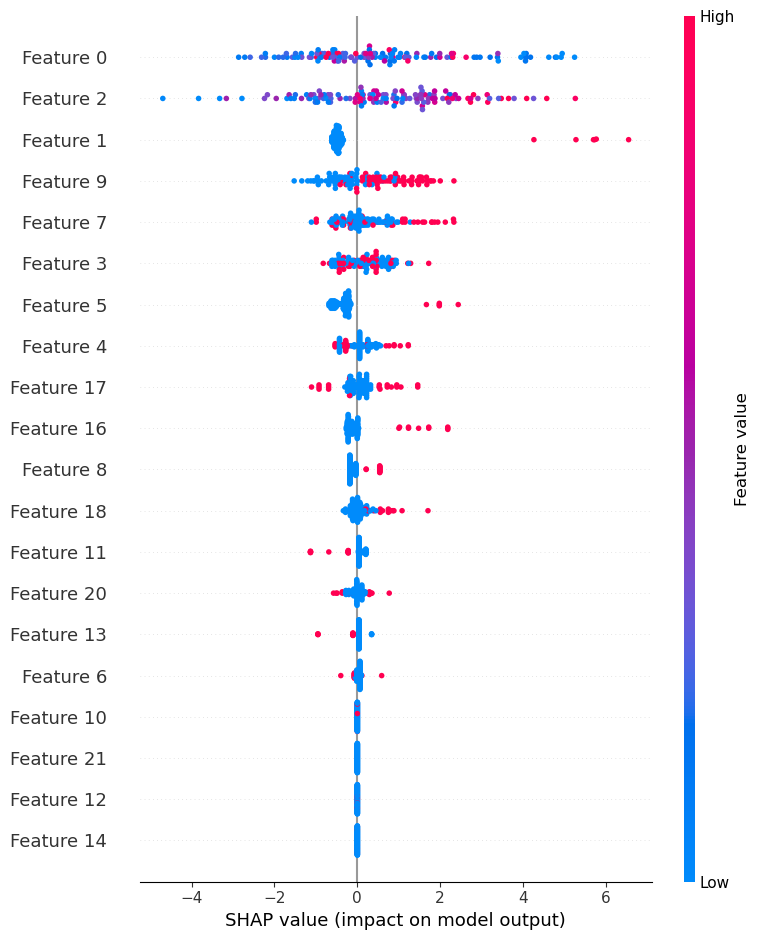

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [43]:
import shap
import xgboost
import lightgbm

from typing import Any
from pandas import DataFrame

def shap_summary_plot(model: Any, X_train: DataFrame, X_test: DataFrame) -> None:
    """
    Calcula os SHAP values para um modelo e um conjunto de exemplos de teste e plota um gráfico de resumo de SHAP.
    Se o modelo for um modelo de árvore de decisão, a função usa o TreeExplainer e o gráfico de waterfall, caso contrário,
    usa o LinearExplainer.

    Parâmetros:
    -----------
    model : objeto
        O modelo a ser interpretado.
    X_train : pandas.DataFrame
        Conjunto de treinamento usado para treinar o modelo.
    X_test : pandas.DataFrame
        Conjunto de exemplos de teste para calcular os SHAP values.
    """
    if isinstance(model, (xgboost.XGBClassifier, xgboost.XGBRegressor, lightgbm.LGBMClassifier, lightgbm.LGBMRegressor)):
        explainer = shap.TreeExplainer(model)
    else:
        explainer = shap.LinearExplainer(model, X_train)

    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test)

    if isinstance(model, (xgboost.XGBClassifier, xgboost.XGBRegressor, lightgbm.LGBMClassifier, lightgbm.LGBMRegressor)):
        shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[0].reshape(-1), feature_names=X_test.columns, show=True)


shap_summary_plot(model, X_train, X_test)

In [42]:
import shap
rf_shap_values = shap.KernelExplainer(rf_clf.predict,X_test)

Using 125 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/125 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


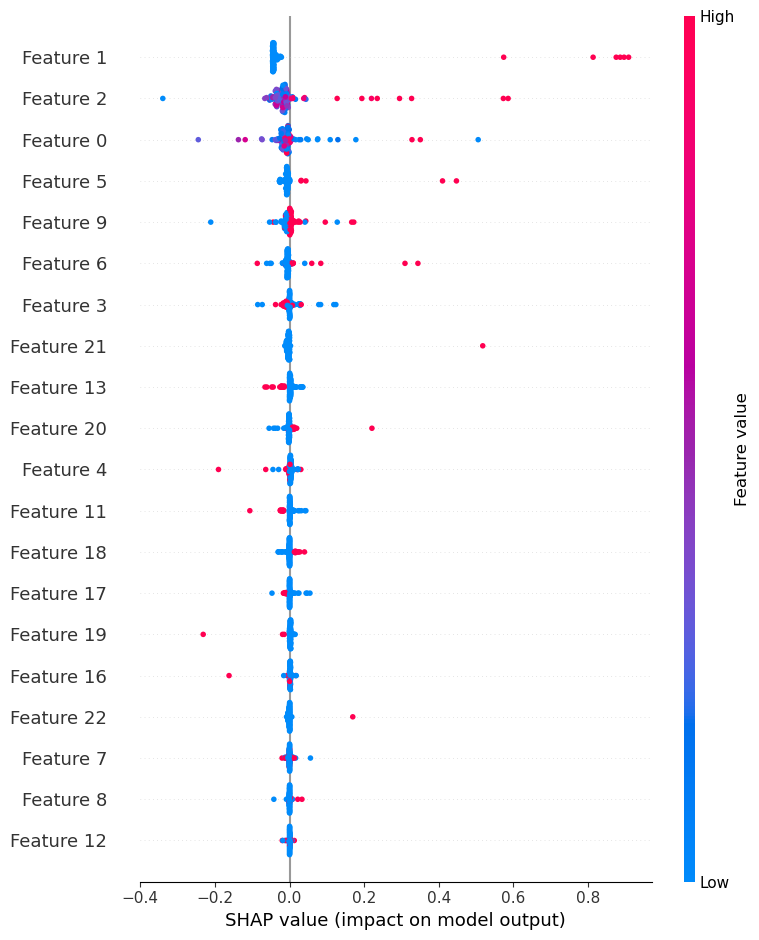

In [39]:
shap_values = rf_shap_values.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [40]:
shap.plots._waterfall.waterfall_legacy(rf_shap_values.expected_value, shap_values[0].reshape(-1), feature_names=X_test.columns, show=True)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [41]:
rf_shap_values = shap.KernelExplainer(rf_clf.predict,X_train)

Using 375 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
